<a href="https://colab.research.google.com/github/shreyas-sreedhar/gen-ai-csye7380/blob/main/Assingment-03/Assignment03_2_Shreyas_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSYE7380 - Assignment 03_2 - Shreyas Sreedhar

In [1]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib


B) Classify CIFAR 10 images with a CNN model but study the effect on the performance by varying the following modeling aspects:

1. Batch Normalization
2. Dropout
3. Number of convolution and pooling layers
4. Activation function

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np

In [5]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [6]:

X_train = X_train[:10000]  # Use only 10k samples for faster training
y_train = y_train[:10000]


In [7]:
def create_model(num_conv_layers, dropout_rate, batch_norm, activation_func):
    model = models.Sequential()

    # Initial Conv Layer
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation(activation_func))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # Add subsequent convolution layers
    for i in range(1, num_conv_layers):
        model.add(layers.Conv2D(64 * min(i, 2), (3, 3), padding='same'))
        if batch_norm and i % 2 == 0:
            model.add(layers.BatchNormalization())
        model.add(layers.Activation(activation_func))
        if i % 2 == 0:
            model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(layers.Dropout(dropout_rate))

    # Flatten before Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256))  # Reduced size for faster training
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation(activation_func))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [8]:

# Parameters for different cases
scenarios = [
    {'name': 'Best Case', 'num_conv_layers': 3, 'dropout_rate': 0.3, 'batch_norm': True, 'activation_func': 'relu'},
    {'name': 'Medium Case', 'num_conv_layers': 2, 'dropout_rate': 0.1, 'batch_norm': True, 'activation_func': 'leaky_relu'},
    {'name': 'Worst Case', 'num_conv_layers': 1, 'dropout_rate': 0.0, 'batch_norm': False, 'activation_func': 'tanh'},
]


In [11]:

# Testing only one secarnio
scenarios2 = [
    {'name': 'Best Case', 'num_conv_layers': 10, 'dropout_rate': 0.3, 'batch_norm': True, 'activation_func': 'relu'}
]



Training for Best Case...
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.3004 - loss: 2.0728 - val_accuracy: 0.1004 - val_loss: 3.1120
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 133s 952ms/step - accuracy: 0.4765 - loss: 1.4537 - val_accuracy: 0.1271 - val_loss: 3.9811
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 948ms/step - accuracy: 0.5253 - loss: 1.2998 - val_accuracy: 0.1498 - val_loss: 3.4775
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 77s 982ms/step - accuracy: 0.5624 - loss: 1.2162 - val_accuracy: 0.1998 - val_loss: 3.0753
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 944ms/step - accuracy: 0.5976 - loss: 1.1186 - val_accuracy: 0.3060 - val_loss: 2.2418
313/313 - 14s - 46ms/step - accuracy: 0.3060 - loss: 2.2418
Best Case Test Accuracy: 0.3059999942779541

Training for Medium Case...
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 515ms/step - accuracy: 0.3660 - loss: 1.9702 - val_accuracy: 0.1308 - val_loss: 3.0581
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 519ms/step - accuracy: 0.5572 - l

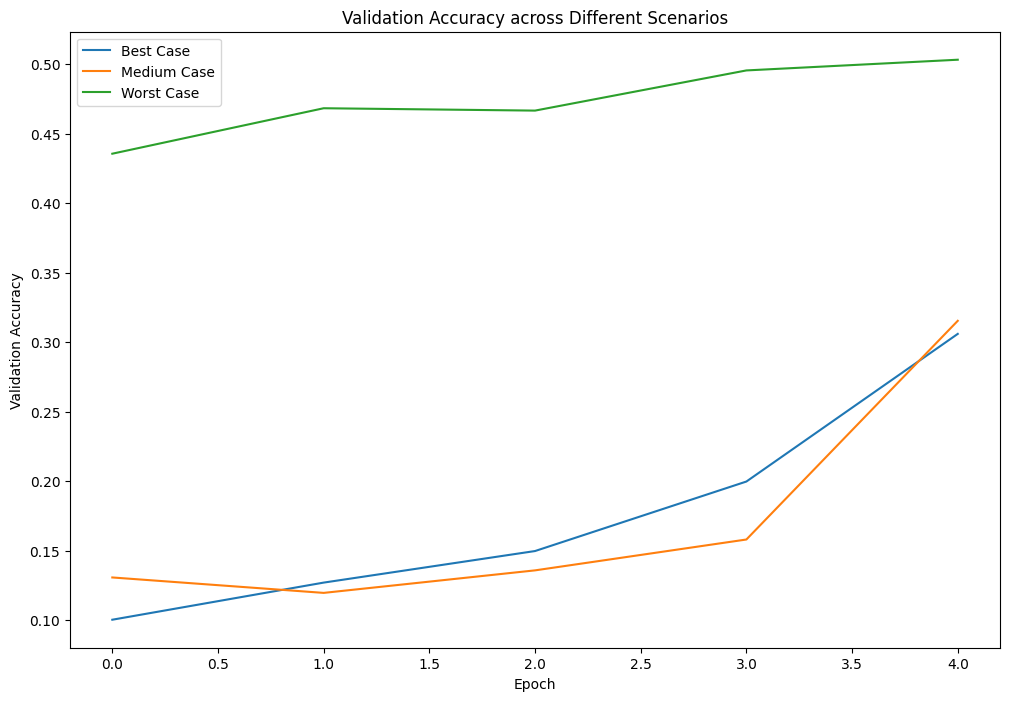

In [10]:
results = {}

for scenario in scenarios:
    print(f"\nTraining for {scenario['name']}...")

    # Create model
    model = create_model(
        num_conv_layers=scenario['num_conv_layers'],
        dropout_rate=scenario['dropout_rate'],
        batch_norm=scenario['batch_norm'],
        activation_func=scenario['activation_func']
    )

    # Train the model with fewer epochs and larger batch size for faster training
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)

    # Store accuracy for comparison
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    results[scenario['name']] = {'history': history.history, 'test_acc': test_acc}

    print(f"{scenario['name']} Test Accuracy: {test_acc}")

# Plot the results for each scenario
plt.figure(figsize=(12, 8))
for scenario in scenarios:
    plt.plot(results[scenario['name']]['history']['val_accuracy'], label=scenario['name'])

plt.title('Validation Accuracy across Different Scenarios')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


Training for Best Case...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 963ms/step - accuracy: 0.2895 - loss: 2.1243 - val_accuracy: 0.1084 - val_loss: 3.4839
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 979ms/step - accuracy: 0.4486 - loss: 1.5271 - val_accuracy: 0.1000 - val_loss: 4.0017
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5117 - loss: 1.3377 - val_accuracy: 0.1022 - val_loss: 4.0780
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 973ms/step - accuracy: 0.5623 - loss: 1.2104 - val_accuracy: 0.1181 - val_loss: 3.6487
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 76s 963ms/step - accuracy: 0.5943 - loss: 1.1202 - val_accuracy: 0.2456 - val_loss: 2.5717
313/313 - 14s - 46ms/step - accuracy: 0.2456 - loss: 2.5717
Best Case Test Accuracy: 0.24560000002384186

Training for Medium Case...
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 517ms/step - accuracy: 0.3415 - loss: 2.2035 - val_accuracy: 0.1462 - val_loss: 3.0540
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 507ms/step - accuracy: 0.5607 - loss: 1.2533 - val_accuracy

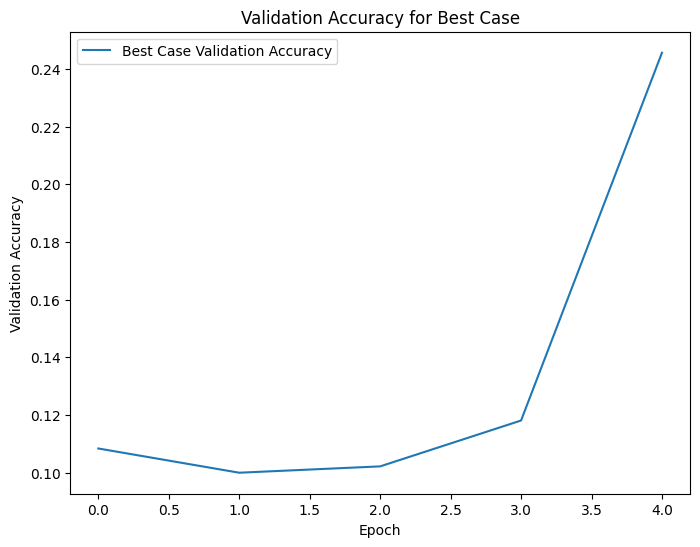

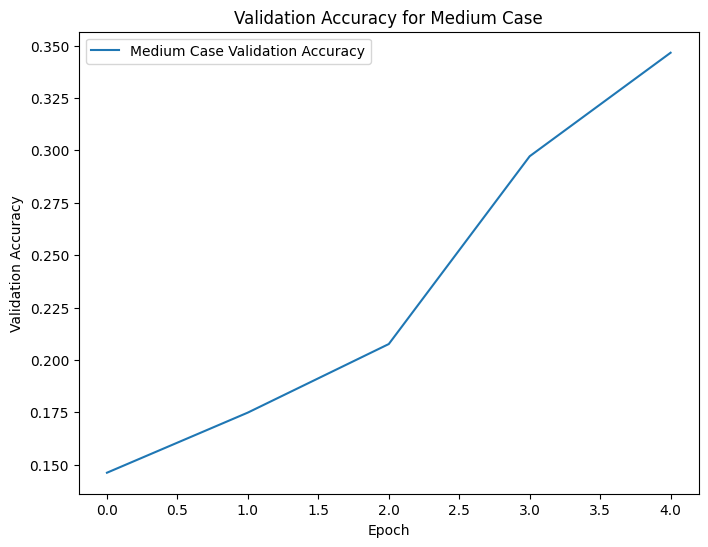

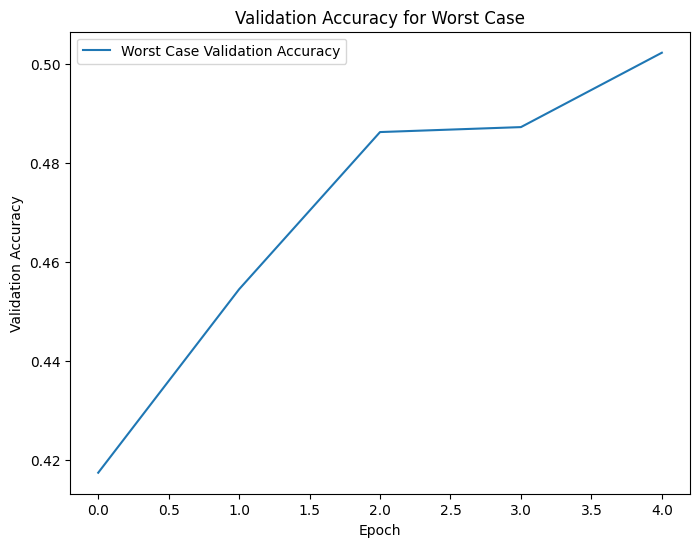

In [14]:
results = {}

for scenario in scenarios:
    print(f"\nTraining for {scenario['name']}...")

    # Create model
    model = create_model(
        num_conv_layers=scenario['num_conv_layers'],
        dropout_rate=scenario['dropout_rate'],
        batch_norm=scenario['batch_norm'],
        activation_func=scenario['activation_func']
    )

    # Train the model with fewer epochs and larger batch size for faster training
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)

    # Store accuracy for comparison
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    results[scenario['name']] = {'history': history.history, 'test_acc': test_acc}

    print(f"{scenario['name']} Test Accuracy: {test_acc}")

for scenario in scenarios:
    plt.figure(figsize=(8, 6))
    plt.plot(results[scenario['name']]['history']['val_accuracy'], label=f"{scenario['name']} Validation Accuracy")

    plt.title(f'Validation Accuracy for {scenario["name"]}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()


Training for Best Case...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Exception ignored in: <function _xla_gc_callback at 0x7aeb752544c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.1365 - loss: 2.5007 - val_accuracy: 0.1000 - val_loss: 2.4425
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.1913 - loss: 2.1065 - val_accuracy: 0.1000 - val_loss: 2.8941
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1914 - loss: 2.0185 - val_accuracy: 0.1001 - val_loss: 3.0356
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.2144 - loss: 1.9562 - val_accuracy: 0.1136 - val_loss: 2.7401
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.2602 - loss: 1.8703 - val_accuracy: 0.1079 - val_loss: 2.9610
313/313 - 24s - 77ms/step - accuracy: 0.1079 - loss: 2.9610
Best Case Test Accuracy: 0.10790000110864639


KeyError: 'Medium Case'

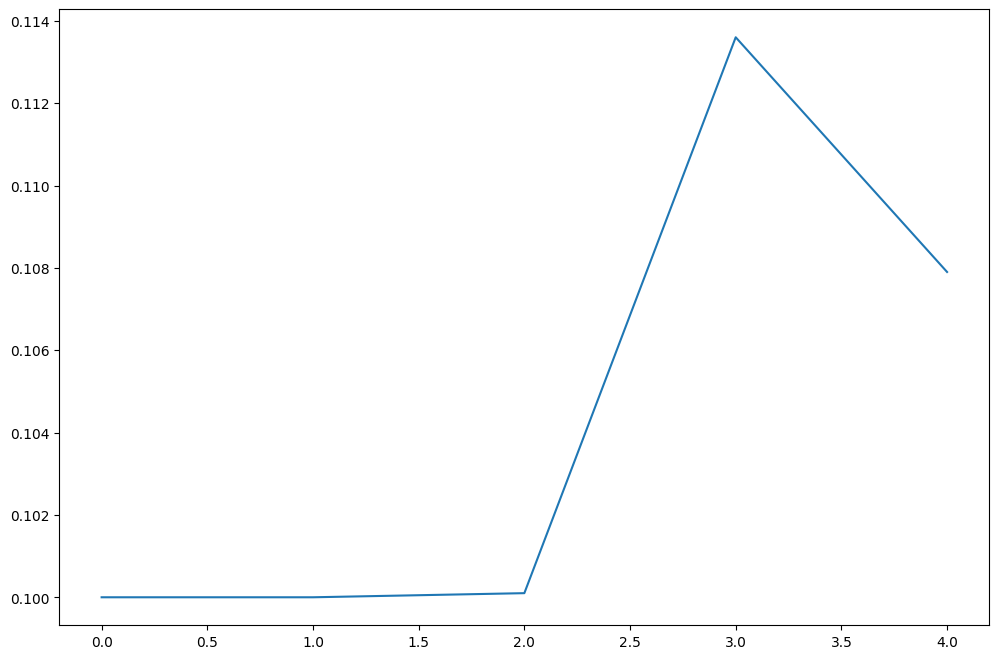

In [12]:
results = {}

for scenario in scenarios2:
    print(f"\nTraining for {scenario['name']}...")

    # Create model
    model = create_model(
        num_conv_layers=scenario['num_conv_layers'],
        dropout_rate=scenario['dropout_rate'],
        batch_norm=scenario['batch_norm'],
        activation_func=scenario['activation_func']
    )

    # Train the model with fewer epochs and larger batch size for faster training
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=128)

    # Store accuracy for comparison
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    results[scenario['name']] = {'history': history.history, 'test_acc': test_acc}

    print(f"{scenario['name']} Test Accuracy: {test_acc}")

# Plot the results for each scenario
plt.figure(figsize=(12, 8))
for scenario in scenarios2:
    plt.plot(results[scenario['name']]['history']['val_accuracy'], label=scenario['name'])

plt.title('Validation Accuracy across Different Scenarios')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()